
# Installation


In [3]:
import torch
print(torch.__version__)

1.9.0+cu111


In [4]:
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.9.0+cu111.html

Looking in links: https://data.pyg.org/whl/torch-1.9.0+cu111.html
     |████████████████████████████████| 10.4 MB 2.0 MB/s 
     |████████████████████████████████| 3.7 MB 41.1 MB/s 
     |████████████████████████████████| 1.6 MB 45.6 MB/s 
     |████████████████████████████████| 870 kB 28.8 MB/s 
     |████████████████████████████████| 308 kB 5.1 MB/s 
     |████████████████████████████████| 407 kB 40.9 MB/s 
     |████████████████████████████████| 45 kB 3.1 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.0.1-py3-none-any.whl size=513822 sha256=457efa5c71aa933a44ac51f02ac8ae0d056292de62e0afb808e6018eb7d78e87
  Stored in directory: /root/.cache/pip/wheels/78/3d/42/20589db73c66b5109fb93a0c5743edfd6ab5ca820a52afacfc
Successfully built torch-geometric


In [6]:
!pip install tensorboardX

     |████████████████████████████████| 124 kB 5.1 MB/s 


## Graph Data

임의로 생성한 그래프를 torch_geometric.data의 Data 타입으로 생성하기

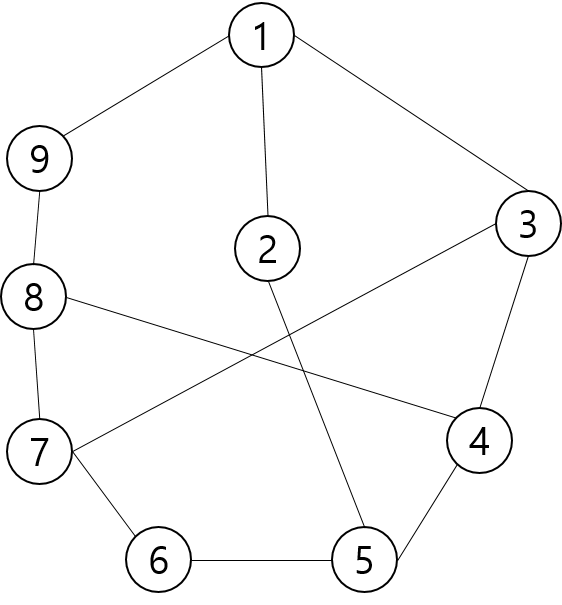

mGraph1      
* num_node : 9
* num_edge : 12

In [2]:
 import torch
 from torch_geometric.data import Data

 edges = [[1,2],[1,3], [1,9], [2,5], [3,4], [3,7], [4,5], [4,8], [5,6], [6,7], [7,8], [8,9]]
 print(f'edges : {edges}\n')
 edge_list = []
 for e in edges:
   e2 = [e[1], e[0]]
   edge_list.append(e)
   edge_list.append(e2)
 edge_list = torch.tensor(edge_list, dtype=torch.long)

 node_feature = [[1, 3], [2, 2], [3,3],[4,3],[5,3],[6,2],[7,3],[8,3],[9,2]]
 node_feature = torch.tensor(node_feature, dtype=torch.float)
 print(node_feature,'\n')

 g = Data(x=node_feature, edge_index=edge_list.T.contiguous())
 print(g)

edges : [[1, 2], [1, 3], [1, 9], [2, 5], [3, 4], [3, 7], [4, 5], [4, 8], [5, 6], [6, 7], [7, 8], [8, 9]]

tensor([[1., 3.],
        [2., 2.],
        [3., 3.],
        [4., 3.],
        [5., 3.],
        [6., 2.],
        [7., 3.],
        [8., 3.],
        [9., 2.]]) 

Data(x=[9, 2], edge_index=[2, 24])


In [3]:
g.x

tensor([[1., 3.],
        [2., 2.],
        [3., 3.],
        [4., 3.],
        [5., 3.],
        [6., 2.],
        [7., 3.],
        [8., 3.],
        [9., 2.]])

In [4]:
g.edge_index

tensor([[1, 2, 1, 3, 1, 9, 2, 5, 3, 4, 3, 7, 4, 5, 4, 8, 5, 6, 6, 7, 7, 8, 8, 9],
        [2, 1, 3, 1, 9, 1, 5, 2, 4, 3, 7, 3, 5, 4, 8, 4, 6, 5, 7, 6, 8, 7, 9, 8]])

In [5]:
g.has_isolated_nodes()

False

## TUDataSet

* a variety of graph kernel benchmark datasets
* "IMDB-BINARY", "REDDIT_BINARY" or "PROTEINS" collected from the TU Dortmund University

In [7]:
from torch_geometric.datasets import TUDataset

In [8]:
tu = TUDataset(root='./tmp/ENZYMES', name='ENZYMES')

Extracting /tmp/ENZYMES/ENZYMES/ENZYMES.zip
Processing...
Done!


In [21]:
print(type(tu))
print(dir(tu))

<class 'torch_geometric.datasets.tu_dataset.TUDataset'>
['__add__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_data_list', '_download', '_indices', '_process', 'cleaned', 'cleaned_url', 'collate', 'copy', 'data', 'download', 'get', 'index_select', 'indices', 'len', 'name', 'num_classes', 'num_edge_attributes', 'num_edge_features', 'num_edge_labels', 'num_features', 'num_node_attributes', 'num_node_features', 'num_node_labels', 'pre_filter', 'pre_transform', 'process', 'processed_dir', 'processed_file_names', 'processed_paths', 'raw_dir', 'raw_file_names', 'raw_paths', 'root', 'shuffle', 'slices

In [17]:
print(len(tu))
print(tu.name)
print(f'num_classes = {tu.num_classes}')
print(f'num_node_features = {tu.num_node_features}')
print(f'num_edge_features = {tu.num_edge_features}')

600
ENZYMES
num_classes = 6
num_node_features = 3
num_edge_features = 0


In [26]:
enz101 = tu[101]
print(type(enz101))
print(dir(enz101),'\n')

print(f"enz101 key : {enz101.keys}")
print(f'num nodes of enz101 = {enz101.num_nodes}')
print(f'num edges of enz101 = {enz101.num_edges}')

<class 'torch_geometric.data.data.Data'>
['__call__', '__cat_dim__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__inc__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_store', 'apply', 'apply_', 'batch', 'clone', 'coalesce', 'contains_isolated_nodes', 'contains_self_loops', 'contiguous', 'cpu', 'cuda', 'debug', 'detach', 'detach_', 'edge_attr', 'edge_index', 'edge_stores', 'from_dict', 'has_isolated_nodes', 'has_self_loops', 'is_coalesced', 'is_directed', 'is_undirected', 'keys', 'node_stores', 'num_edge_features', 'num_edges', 'num_faces', 'num_features', 'num_node_features',

In [24]:
print(enz101.x)

tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])


In [28]:
print(enz101.y)

tensor([4])


In [29]:
print(enz101.edge_index)

tensor([[ 0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  4,  4,  4,  4,
          5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  8,  8,  8,  9,
          9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 13, 13, 13,
         14, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 17, 17, 17, 17, 17, 18,
         18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 23, 23,
         23, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32, 32,
         32, 33, 33, 33, 33, 34, 34, 34, 35, 35, 35, 35, 35, 36, 36, 36, 36, 37,
         37, 37, 37, 37, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 40, 41, 41,
         41, 41],
        [ 1, 26, 34,  0,  2, 15, 26,  1, 14, 33, 41, 32, 33, 40, 31, 32, 39, 40,
         30, 31, 38, 39,  7, 18, 20, 30,  6, 19, 29, 30, 37, 38,  9, 29, 37,  8,
         28, 29, 36, 37, 11, 27, 28, 36, 10, 12, 27, 35, 11, 27, 35, 14, 26, 34,
          

## GNNBenchmarkDataset

* A variety of artificially and semi-artificially generated graph datasets
* 논문 "Benchmarking Graph Neural Networks"

In [30]:
from torch_geometric.datasets import GNNBenchmarkDataset

In [40]:
"""
name 
  node classification : 'PATTERN', 'CLUSTER'
  link prediction : 'TSP', 'COLLAB'
  graph regression : 'ZINC'
  graph classification : 'MNIST', 'CIFAR10', 'CSL'
"""
gb_pat = GNNBenchmarkDataset(root='./tmp/GBD', name='PATTERN', split='train')

Extracting tmp/GBD/PATTERN/raw/PATTERN_v2.zip
Processing...
Done!


In [41]:
pat004 = gb_pat[4]

In [47]:
print(f'pat004.num_nodes = {pat004.num_nodes}')
print(f'pat004.num_edges = {pat004.num_edges}')
print(pat004.keys)

pat004.num_nodes = 135
pat004.num_edges = 7484
['y', 'x', 'edge_index']


In [44]:
print(pat004.x)

tensor([[0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1

In [48]:
print(pat004.y)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [49]:
gb_mnist = GNNBenchmarkDataset(root='./tmp/GBD', name='MNIST')

Extracting tmp/GBD/MNIST/raw/MNIST_v2.zip
Processing...
Done!


In [56]:
print(len(gb_mnist))
print(type(gb_mnist))

55000
<class 'torch_geometric.datasets.gnn_benchmark_dataset.GNNBenchmarkDataset'>


In [51]:
mnist77 = gb_mnist[77]
print(f'num of nodes = {mnist77.num_nodes}')
print(f'num of node features = {mnist77.num_node_features}')
print(f'num of edges = {mnist77.num_edges}')

num of nodes = 73
num of node features = 1
num of edges = 584


In [52]:
mnist77.x

tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.9502],
        [0.0078],
        [0.0000],
        [0.0000],
        [0.0735],
        [0.0000],
        [0.0027],
        [0.0000],
        [0.0275],
        [0.0000],
        [0.1522],
        [0.0000],
        [0.0000],
        [0.1171],
        [0.0228],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0126],
        [0.0000],
        [0.0742],
        [0.0000],
        [0.0000],
        [0.0848],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.8164],
        [0.0000],
        [0.7642],
        [0.0000],
        [0.0000],
        [0.8809],
        [0.0688],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.8477],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.9844],
        [0.0112],
        [0.0608],
        [0.0000],
        [0.0000],
        [0.0467],
        [0.0000],
        [0.8052],
        [0

In [53]:
mnist77.y

tensor([4])

## Make Own Dataset

* disk에 저장하지 않고 synthetic data를 만들자.
* 간단히 list[torch_geometric.data.Data] 를 사용하면 된다!
* 근데 왜 loader로 for loop 구성하는건 안될까...

In [ ]:
from torch_geometric.loader import DataLoader

# 이전에 정의한 mgraph1 사용
edges = [[1,2],[1,3], [1,9], [2,5], [3,4], [3,7], [4,5], [4,8], [5,6], [6,7], [7,8], [8,9]]
 
edge_list = []
for e in edges:
  e2 = [e[1], e[0]]
  edge_list.append(e)
  edge_list.append(e2)
edge_list = torch.tensor(edge_list, dtype=torch.long)

node_feature = [[1, 3], [2, 2], [3,3],[4,3],[5,3],[6,2],[7,3],[8,3],[9,2]]
node_feature = torch.tensor(node_feature, dtype=torch.float)
g = Data(x=node_feature, edge_index=edge_list.T.contiguous())

n_f2 = torch.tensor([[1,3,4], [2,2,4], [3,3,6],[4,3,7],[5,3,8],[6,2,8],[7,3,10],[8,3,11],[9,2,11]],dtype=torch.float)
g2 = Data(x=n_f2, edge_index=edge_list.T.contiguous())

n_f3 = torch.tensor([[1], [2], [3],[4],[5],[6],[7],[8],[9]],dtype=torch.float)
g3 = Data(x=n_f3, edge_index=edge_list.T.contiguous())


In [69]:
my_dataset = [g, g2, g3, g, g2, g3]
loader = DataLoader(my_dataset, batch_size=2, shuffle=True)
print(loader)

for d in loader:
  print(d,'\n')

RuntimeError: ignored